In [1]:
# mount and imports

from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from skimage.io import imread
from skimage.color import rgb2gray
import pandas as pd

Mounted at /content/drive


## **creation performance measures excel**

create df

In [ ]:
df = pd.DataFrame()


add RGB id's col

In [ ]:
import os
import pandas as pd

# Define the directory containing the images
image_dir = '/content/drive/Othercomputers/My PC/Thesis/Performance measures/data/RGB'

# Get a list of image file names without the extension
image_files = [os.path.splitext(f)[0] for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Create a DataFrame and add the "RGB id" column
df = pd.DataFrame({'RGB_id': image_files})

# Display the DataFrame
print(df)


      RGB_id
0   1D3A3155
1   1D3A3159
2   1D3A3345
3   1D3A3208
4   1D3A3259
..       ...
95  1D3A5391
96  1D3A5499
97  1D3A5385
98  1D3A5619
99  1D3A5388

[100 rows x 1 columns]


read combined2023 df

In [ ]:
# Path to the Excel file
file_path = '/content/drive/Othercomputers/My PC/Thesis/raw_data/combined2023.xlsx'

# Create a DataFrame by reading the Excel file
combined2023 = pd.read_excel(file_path)

# Display the DataFrame
print(combined2023)


     Tree number Direction north =1. South=2 Mandarin number  Thermal20230825  \
0              1                       north               1              816   
1              1                       north               2              817   
2              1                       north               3              818   
3              1                       north               4              819   
4              2                       north               1              823   
..           ...                         ...             ...              ...   
300           12                       south               3             1136   
301           12                       south               4             1137   
302           12                       south               5             1138   
303           12                       south               6             1139   
304           12                       south               7             1140   

     RGB20230825 Thermal202

add new col to df "Thermal_id"

In [ ]:
# Create a new column called "Thermal_id" in the existing 'df' DataFrame (initially with empty values)
df['Thermal_id'] = None

# Display the updated DataFrame
print(df)


      RGB_id Thermal_id
0   1D3A3155       None
1   1D3A3159       None
2   1D3A3345       None
3   1D3A3208       None
4   1D3A3259       None
..       ...        ...
95  1D3A5391       None
96  1D3A5499       None
97  1D3A5385       None
98  1D3A5619       None
99  1D3A5388       None

[100 rows x 2 columns]


Add fit Thermal image

In [ ]:
# Step 1: Extract the last 4 characters from the 'RGB id' column in df
df['Last_4_RGB'] = df['RGB_id'].str[-4:]

# Step 2: Iterate through df to search in combined2023
for index, row in df.iterrows():
    last_4_chars = row['Last_4_RGB']

    # Step 3: Search for the last 4 characters in combined2023
    found = False
    for i, combined_row in combined2023.iterrows():
        for col_index in range(1, len(combined_row)):
            # Convert cell value to string and search for the last 4 characters
            cell_value = str(combined_row.iloc[col_index])
            if last_4_chars in cell_value:
                # Step 4: Get the value from the left column in the same row (ensuring the column exists)
                left_column_value = str(combined_row.iloc[col_index - 1])
                # Insert this value into the 'Thermal_id' column in df
                df.at[index, 'Thermal_id'] = left_column_value
                found = True
                break
        if found:
            break

# Step 5: Remove the helper column 'Last_4_RGB' from df
df.drop(columns=['Last_4_RGB'], inplace=True)

# Display the updated DataFrame
print(df)


      RGB_id Thermal_id
0   1D3A3155        843
1   1D3A3159        830
2   1D3A3345       1013
3   1D3A3208        881
4   1D3A3259        930
..       ...        ...
95  1D3A5391       1891
96  1D3A5499       1999
97  1D3A5385       1885
98  1D3A5619       2119
99  1D3A5388       1888

[100 rows x 2 columns]


add ground truth valus of area (calculated manually)

In [ ]:
# Step 1: Add a new column 'RGB_gt_area' to df
df['RGB_gt_area'] = None

In [ ]:
import cv2
import os

# Step 1: Add a new column 'RGB_gt_area' to df
df['RGB_gt_area'] = None

# Step 2: Define the path where the mask images are stored
mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM'

# Step 3: Iterate over the DataFrame and process each mask image
for index, row in df.iterrows():
    rgb_id = row['RGB_id'][:8]  # Take only the first 8 characters of the RGB id

    # Look for the mask image in the mask_folder by comparing the first 8 characters
    mask_image = None
    for mask_filename in os.listdir(mask_folder):
        if mask_filename.startswith(rgb_id):
            mask_image_path = os.path.join(mask_folder, mask_filename)
            if os.path.exists(mask_image_path):
                # Load the mask image
                mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
                break

    # Step 4: If a mask image is found, calculate the number of black pixels
    if mask_image is not None:
        # Calculate the number of black pixels (value 0 in the image)
        black_pixel_count = (mask_image == 0).sum()

        # Step 5: Insert the black pixel count into the 'RGB_gt_area' column
        df.at[index, 'RGB_gt_area'] = black_pixel_count
    else:
        print(f"No matching mask image found for {rgb_id}")

# Display the updated DataFrame
print(df)


      RGB_id Thermal_id RGB_gt_area
0   1D3A3155        843     4764517
1   1D3A3159        830     3658096
2   1D3A3345       1013     5511131
3   1D3A3208        881     3023908
4   1D3A3259        930     7079853
..       ...        ...         ...
95  1D3A5391       1891     6568740
96  1D3A5499       1999     9303287
97  1D3A5385       1885     6082396
98  1D3A5619       2119     4880941
99  1D3A5388       1888     4540062

[100 rows x 3 columns]


Add ground truth Thermal images area

In [ ]:
# Step 1: Add a new column 'RGB_gt_area' to df
df['Thermal_gt_area'] = None

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np

# Define the path where the mask images are stored
mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_MANUAL_THERMAL'

# Iterate over the DataFrame and process each mask image
for index, row in df.iterrows():
    # Ensure 'Thermal_id' is treated as a string and check for NaN
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue

    # Format the thermal ID to ensure leading zeros are considered
    thermal_id = f"{int(row['Thermal_id']):04d}"  # Formats the ID as a four-digit string with leading zeros

    # Initialize mask image variable
    mask_image = None
    for mask_filename in os.listdir(mask_folder):
        # Check if the constructed ID ("FLIR" + thermal_id) is in the filename
        if f"FLIR{thermal_id}" in mask_filename:
            mask_image_path = os.path.join(mask_folder, mask_filename)
            if os.path.exists(mask_image_path):
                # Load the mask image
                mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
                break

    # If a mask image is found, calculate the number of black pixels
    if mask_image is not None:
        # Calculate the number of black pixels (value 0 in the image)
        black_pixel_count = (mask_image == 0).sum()

        # Insert the black pixel count into the 'Thermal_gt_area' column
        df.at[index, 'Thermal_gt_area'] = black_pixel_count
    else:
        print(f"No matching mask image found for {thermal_id}")

# Display the updated DataFrame
print(df)


No matching mask image found for 1052
Thermal_id is NaN at index 37
      RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0   1D3A3155       843.0      4764517        5765162            21.0   
1   1D3A3159       830.0      3658096        3793489             3.7   
2   1D3A3345      1013.0      5511131        5718797             3.8   
3   1D3A3208       881.0      3023908        3121218             3.2   
4   1D3A3259       930.0      7079853        7372472             4.1   
..       ...         ...          ...            ...             ...   
95  1D3A5391      1891.0      6568740        6704184             2.1   
96  1D3A5499      1999.0      9303287        9463164             1.7   
97  1D3A5385      1885.0      6082396        6188225             1.7   
98  1D3A5619      2119.0      4880941        5587340            14.5   
99  1D3A5388      1888.0      4540062        4879669             7.5   

    RGB_SAM_area  RGB_SAM_dif_%  RGB_active_contour_area   IOU_SAM 

 Add RGB U^Net result to excel

In [ ]:
# Add or update the 'Unet_area' column
df['RGB_Unet_area'] = 0

In [ ]:
print(df)

      RGB_id Thermal_id RGB_gt_area  RGB_Unet_area
0   1D3A3155        843     4764517              0
1   1D3A3159        830     3658096              0
2   1D3A3345       1013     5511131              0
3   1D3A3208        881     3023908              0
4   1D3A3259        930     7079853              0
..       ...        ...         ...            ...
95  1D3A5391       1891     6568740              0
96  1D3A5499       1999     9303287              0
97  1D3A5385       1885     6082396              0
98  1D3A5619       2119     4880941              0
99  1D3A5388       1888     4540062              0

[100 rows x 4 columns]


In [ ]:
# Step 1: Define the path where the mask images are stored
mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/unet/RGB2023'

# Step 2: Iterate over the DataFrame and process each mask image
for index, row in df.iterrows():
    rgb_id = row['RGB_id'][:8]  # Take only the first 8 characters of the RGB id

    # Look for the mask image in the mask_folder by comparing the first 8 characters
    mask_image = None
    for mask_filename in os.listdir(mask_folder):
        if mask_filename.startswith(rgb_id):
            mask_image_path = os.path.join(mask_folder, mask_filename)
            if os.path.exists(mask_image_path):
                # Load the mask image
                mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
                break

    # Step 3: If a mask image is found, calculate the number of non-white pixels
    if mask_image is not None:
        # Calculate the number of pixels that are different from white (white = 255)
        non_white_pixel_count = (mask_image != 255).sum()

        # Step 4: Insert the non-white pixel count into the 'Unet_area' column
        df.at[index, 'RGB_Unet_area'] = non_white_pixel_count
    else:
        print(f"No matching mask image found for {rgb_id}")

# Display the updated DataFrame
print(df)


Add Thermal U^NET area results

In [ ]:
import cv2
import os
import pandas as pd

# Step 1: Define the path where the mask images are stored
mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/unet/tiff/All2023'

# Step 2: Add a new column 'Thermal_Unet_area' to df for storing non-white pixel count
df['Thermal_Unet_area'] = None

# Step 3: Print all filenames in the mask_folder for debugging
print("Files in the directory:")
for filename in os.listdir(mask_folder):
    print(filename)

# Step 4: Iterate over the DataFrame and process each mask image
for index, row in df.iterrows():
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue  # Skip this iteration if the Thermal_id is NaN

    # Convert 'Thermal_id' to an integer to remove leading zeros, then back to a string for matching
    thermal_id_formatted = f"{int(row['Thermal_id']):04d}"  # Ensure it matches the filename format

    # Look for the mask image in the mask_folder by matching the formatted 'Thermal_id'
    mask_image = None
    expected_filename = f"FLIR{thermal_id_formatted}.tiff"
    for mask_filename in os.listdir(mask_folder):
        if mask_filename == expected_filename:
            mask_image_path = os.path.join(mask_folder, mask_filename)
            if os.path.exists(mask_image_path):
                # Load the mask image
                mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
                break

    # Step 5: If a mask image is found, calculate the number of non-white pixels
    if mask_image is not None:
        non_white_pixel_count = (mask_image != 255).sum()
        df.at[index, 'Thermal_Unet_area'] = non_white_pixel_count
    else:
        print(f"No matching mask image found for Thermal_id: {thermal_id_formatted} (Expected filename: {expected_filename})")

# Step 6: Display the updated DataFrame
print(df)


Files in the directory:
FLIR0987.tiff
FLIR0988.tiff
FLIR0989.tiff
FLIR0995.tiff
FLIR0996.tiff
FLIR0997.tiff
FLIR0998.tiff
FLIR0999.tiff
FLIR1000.tiff
FLIR1001.tiff
FLIR1002.tiff
FLIR1003.tiff
FLIR1004.tiff
FLIR1005.tiff
FLIR1006.tiff
FLIR1007.tiff
FLIR1008.tiff
FLIR1009.tiff
FLIR1010.tiff
FLIR1011.tiff
FLIR1012.tiff
FLIR1013.tiff
FLIR1014.tiff
FLIR1015.tiff
FLIR1016.tiff
FLIR1017.tiff
FLIR1018.tiff
FLIR1019.tiff
FLIR1020.tiff
FLIR1022.tiff
FLIR1023.tiff
FLIR1024.tiff
FLIR1025.tiff
FLIR1026.tiff
FLIR1027.tiff
FLIR1028.tiff
FLIR1029.tiff
FLIR1030.tiff
FLIR1031.tiff
FLIR1033.tiff
FLIR1034.tiff
FLIR1035.tiff
FLIR1036.tiff
FLIR1037.tiff
FLIR1038.tiff
FLIR1039.tiff
FLIR1040.tiff
FLIR1042.tiff
FLIR1043.tiff
FLIR1044.tiff
FLIR1045.tiff
FLIR1047.tiff
FLIR1048.tiff
FLIR1049.tiff
FLIR1050.tiff
FLIR1051.tiff
FLIR1052.tiff
FLIR1053.tiff
FLIR1054.tiff
FLIR1055.tiff
FLIR1056.tiff
FLIR1057.tiff
FLIR1058.tiff
FLIR1059.tiff
FLIR1060.tiff
FLIR1061.tiff
FLIR1062.tiff
FLIR1063.tiff
FLIR1064.tiff
FLIR1065.t

In [ ]:
# df.drop('Thermal_Unet_area', axis=1, inplace=True)

RGB_unet_dif_%

In [ ]:
# Ensure there are no NaN values or invalid entries that would cause issues
df['RGB_gt_area'] = pd.to_numeric(df['RGB_gt_area'], errors='coerce')
df['RGB_Unet_area'] = pd.to_numeric(df['RGB_Unet_area'], errors='coerce')

# Calculate the new column 'RGB_unet_dif_%' with proper rounding and error handling
df['RGB_unet_dif_%'] = df.apply(lambda row: round(abs(row['RGB_gt_area'] - row['RGB_Unet_area']) / row['RGB_gt_area'] * 100, 1)
                                if row['RGB_gt_area'] != 0 else None, axis=1)

# Display the updated DataFrame
print(df)


Thermal_unet_dif_%

In [ ]:
# Ensure there are no NaN values or invalid entries that would cause issues
df['Thermal_gt_area'] = pd.to_numeric(df['Thermal_gt_area'], errors='coerce')
df['Thermal_Unet_area'] = pd.to_numeric(df['Thermal_Unet_area'], errors='coerce')

# Calculate the new column 'RGB_unet_dif_%' with proper rounding and error handling
df['Thermal_unet_dif_%'] = df.apply(lambda row: round(abs(row['Thermal_gt_area'] - row['Thermal_Unet_area']) / row['Thermal_gt_area'] * 100, 1)
                                if row['Thermal_gt_area'] != 0 else None, axis=1)

# Display the updated DataFrame
print(df)

      RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0   1D3A3155       843.0      4764517        5765162            21.0   
1   1D3A3159       830.0      3658096        3793489             3.7   
2   1D3A3345      1013.0      5511131        5718797             3.8   
3   1D3A3208       881.0      3023908        3121218             3.2   
4   1D3A3259       930.0      7079853        7372472             4.1   
..       ...         ...          ...            ...             ...   
95  1D3A5391      1891.0      6568740        6704184             2.1   
96  1D3A5499      1999.0      9303287        9463164             1.7   
97  1D3A5385      1885.0      6082396        6188225             1.7   
98  1D3A5619      2119.0      4880941        5587340            14.5   
99  1D3A5388      1888.0      4540062        4879669             7.5   

    RGB_SAM_area  RGB_SAM_dif_%  RGB_active_contour_area   IOU_SAM  IOU_UNet  \
0        4768320            0.1                      Na

Add SAM RGB automate result to df

In [ ]:

# Step 1: Add a new column 'RGB_SAM_area' to df
df['RGB_SAM_area'] = None

In [ ]:
# Step 2: Define the path where the new mask images are stored
mask_folder_sam = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_automate_mask_ganarator/RGB'

# Step 3: Iterate over the DataFrame and process each mask image
for index, row in df.iterrows():
    rgb_id = row['RGB_id'][:8]  # Take only the first 8 characters of the RGB id

    # Look for the mask image in the mask_folder_sam by comparing the first 8 characters
    mask_image = None
    for mask_filename in os.listdir(mask_folder_sam):
        if mask_filename.startswith(rgb_id):
            mask_image_path = os.path.join(mask_folder_sam, mask_filename)
            if os.path.exists(mask_image_path):
                # Load the mask image
                mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
                break

    # Step 4: If a mask image is found, calculate the number of white pixels (255)
    if mask_image is not None:
        # Calculate the number of white pixels (value 255 in the image)
        white_pixel_count = (mask_image == 255).sum()

        # Step 5: Insert the white pixel count into the 'RGB_SAM_area' column
        df.at[index, 'RGB_SAM_area'] = white_pixel_count
    else:
        print(f"No matching mask image found for {rgb_id}")

# Display the updated DataFrame
print(df)


Add SAM Thermal automate result to df

In [ ]:
# Step 1: Add a new column 'RGB_SAM_area' to df
df['Thermal_SAM_area'] = None

In [ ]:
import cv2
import os
import pandas as pd

# Define the path where the SAM mask images are stored
mask_folder_sam = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_automate_mask_ganarator/Thermal'

# Print all filenames in the mask_folder_sam for debugging
print("Files in the SAM directory:")
for filename in os.listdir(mask_folder_sam):
    print(filename)

# Iterate over the DataFrame and process each mask image
for index, row in df.iterrows():
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue  # Skip this iteration if the Thermal_id is NaN

    # Convert 'Thermal_id' to an integer to remove leading zeros, then back to a string for matching
    thermal_id_formatted = f"{int(row['Thermal_id']):04d}"  # Ensure it matches the filename format

    # Look for the mask image in the mask_folder_sam by matching the formatted 'Thermal_id'
    mask_image = None
    expected_filename = f"FLIR{thermal_id_formatted}_masked.tiff"
    for mask_filename in os.listdir(mask_folder_sam):
        if mask_filename == expected_filename:
            mask_image_path = os.path.join(mask_folder_sam, mask_filename)
            if os.path.exists(mask_image_path):
                # Load the mask image
                mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
                break

    # If a mask image is found, calculate the number of white pixels
    if mask_image is not None:
        # Calculate the number of white pixels (white = 255 in a binary image)
        white_pixel_count = (mask_image == 255).sum()
        df.at[index, 'Thermal_SAM_area'] = white_pixel_count
    else:
        print(f"No matching mask image found for Thermal_id: {thermal_id_formatted} (Expected filename: {expected_filename})")

# Display the updated DataFrame
print(df)


Files in the SAM directory:
FLIR2026_masked.tiff
FLIR2027_masked.tiff
FLIR2028_masked.tiff
FLIR2029_masked.tiff
FLIR2030_masked.tiff
FLIR2031_masked.tiff
FLIR2032_masked.tiff
FLIR2033_masked.tiff
FLIR2034_masked.tiff
FLIR2035_masked.tiff
FLIR2036_masked.tiff
FLIR2037_masked.tiff
FLIR2038_masked.tiff
FLIR2039_masked.tiff
FLIR2040_masked.tiff
FLIR2041_masked.tiff
FLIR2042_masked.tiff
FLIR2043_masked.tiff
FLIR2044_masked.tiff
FLIR2045_masked.tiff
FLIR2046_masked.tiff
FLIR2048_masked.tiff
FLIR2049_masked.tiff
FLIR2050_masked.tiff
FLIR2051_masked.tiff
FLIR2052_masked.tiff
FLIR2053_masked.tiff
FLIR2054_masked.tiff
FLIR2055_masked.tiff
FLIR2056_masked.tiff
FLIR2057_masked.tiff
FLIR2058_masked.tiff
FLIR2059_masked.tiff
FLIR2060_masked.tiff
FLIR2061_masked.tiff
FLIR2062_masked.tiff
FLIR2063_masked.tiff
FLIR2064_masked.tiff
FLIR2065_masked.tiff
FLIR2066_masked.tiff
FLIR2067_masked.tiff
FLIR2068_masked.tiff
FLIR2069_masked.tiff
FLIR2070_masked.tiff
FLIR2071_masked.tiff
FLIR2072_masked.tiff
FLIR20

RGB_SAM_dif_%

In [ ]:
# Ensure there are no NaN values or invalid entries that would cause issues
df['RGB_gt_area'] = pd.to_numeric(df['RGB_gt_area'], errors='coerce')
df['RGB_SAM_area'] = pd.to_numeric(df['RGB_SAM_area'], errors='coerce')

# Calculate the new column 'RGB_unet_dif_%' with proper rounding and error handling
df['RGB_SAM_dif_%'] = df.apply(lambda row: round(abs(row['RGB_gt_area'] - row['RGB_SAM_area']) / row['RGB_gt_area'] * 100, 1)
                                if row['RGB_gt_area'] != 0 else None, axis=1)

# Display the updated DataFrame
print(df)


Thermal_SAM_dif_%

In [ ]:
# Ensure there are no NaN values or invalid entries that would cause issues
df['Thermal_gt_area'] = pd.to_numeric(df['Thermal_gt_area'], errors='coerce')
df['Thermal_SAM_area'] = pd.to_numeric(df['Thermal_SAM_area'], errors='coerce')

# Calculate the new column 'RGB_unet_dif_%' with proper rounding and error handling
df['Thermal_SAM_dif_%%'] = df.apply(lambda row: round(abs(row['Thermal_gt_area'] - row['Thermal_SAM_area']) / row['Thermal_gt_area'] * 100, 1)
                                if row['Thermal_gt_area'] != 0 else None, axis=1)

# Display the updated DataFrame
print(df)

      RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0   1D3A3155       843.0      4764517        5765162            21.0   
1   1D3A3159       830.0      3658096        3793489             3.7   
2   1D3A3345      1013.0      5511131        5718797             3.8   
3   1D3A3208       881.0      3023908        3121218             3.2   
4   1D3A3259       930.0      7079853        7372472             4.1   
..       ...         ...          ...            ...             ...   
95  1D3A5391      1891.0      6568740        6704184             2.1   
96  1D3A5499      1999.0      9303287        9463164             1.7   
97  1D3A5385      1885.0      6082396        6188225             1.7   
98  1D3A5619      2119.0      4880941        5587340            14.5   
99  1D3A5388      1888.0      4540062        4879669             7.5   

    RGB_SAM_area  RGB_SAM_dif_%  RGB_active_contour_area   IOU_SAM  IOU_UNet  \
0        4768320            0.1                      Na

Add RGB Active contour results

In [2]:
import pandas as pd

# Specify the path to your Excel file in Google Drive
file_path = '/content/drive/Othercomputers/My PC/Thesis/Performance measures/performance_measures.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)
df.head()  # Display the first few rows


,RGB_id,Thermal_id,RGB_gt_area,RGB_Unet_area,RGB_unet_dif_%,RGB_SAM_area,RGB_SAM_dif_%,RGB_active_contour_area,IOU_SAM,IOU_UNet,Thermal_gt_area,Thermal_Unet_area,Thermal_unet_dif_%,Thermal_SAM_area,Thermal_SAM_dif_%%,IOU_UNet_thermal,IOU_SAM_thermal
0,1D3A3155,843.0,4764517,5765162,21.0,4768320,0.1,NaN,0.996060,0.708322,53590.0,15988.0,70.2,54176.0,1.1,0.298339,0.977757
1,1D3A3159,830.0,3658096,3793489,3.7,3673136,0.4,NaN,0.994893,0.964274,32130.0,142881.0,344.7,32832.0,2.2,0.000171,0.972850
2,1D3A3345,1013.0,5511131,5718797,3.8,5527792,0.3,NaN,0.996594,0.963673,49782.0,51929.0,4.3,50272.0,1.0,0.955379,0.984175
3,1D3A3208,881.0,3023908,3121218,3.2,3030160,0.2,NaN,0.995805,0.968517,52296.0,3513.0,93.3,54544.0,4.3,0.000000,0.955344
4,1D3A3259,930.0,7079853,7372472,4.1,7131264,0.7,NaN,0.992758,0.960199,58568.0,23123.0,60.5,60512.0,3.3,0.000220,0.964044


Add Active contour areas

In [3]:

# Step 1: Add a new column 'RGB_SAM_area' to df
df['RGB_active_contour_area'] = None

In [7]:
import cv2
import os

# Path to active contour result images
active_contour_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/active_contour/results'

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    rgb_id = row['RGB_id']  # Get the RGB_id from the DataFrame
    found_match = False

    # Iterate over files in the active_contour_results folder to find a match
    for file_name in os.listdir(active_contour_folder):
        # Check if the file name contains the RGB_id (remove hard-coded slicing)
        if rgb_id in file_name:
            # Load the active contour result image
            image_path = os.path.join(active_contour_folder, file_name)
            active_contour_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Ensure the image was loaded correctly
            if active_contour_image is not None:
                # Calculate the sum of non-white pixels (pixels != 255)
                non_white_pixels = (active_contour_image < 255).sum()

                # Store the result in the 'RGB_active_contour_area' column
                df.at[index, 'RGB_active_contour_area'] = non_white_pixels
                found_match = True
            break  # Stop once a match is found

    # Print the RGB_id if no match is found
    if not found_match:
        print(f"No match found for {rgb_id}")

# Display the updated DataFrame
print(df.head())


     RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0  1D3A3155       843.0      4764517        5765162            21.0   
1  1D3A3159       830.0      3658096        3793489             3.7   
2  1D3A3345      1013.0      5511131        5718797             3.8   
3  1D3A3208       881.0      3023908        3121218             3.2   
4  1D3A3259       930.0      7079853        7372472             4.1   

   RGB_SAM_area  RGB_SAM_dif_% RGB_active_contour_area   IOU_SAM  IOU_UNet  \
0       4768320            0.1                 6228465  0.996060  0.708322   
1       3673136            0.4                 3999767  0.994893  0.964274   
2       5527792            0.3                 3956333  0.996594  0.963673   
3       3030160            0.2                 7131368  0.995805  0.968517   
4       7131264            0.7                 3248585  0.992758  0.960199   

   Thermal_gt_area  Thermal_Unet_area  Thermal_unet_dif_%  Thermal_SAM_area  \
0          53590.0       

In [ ]:
print(df)

      RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0   1D3A3155       843.0      4764517        5765162            21.0   
1   1D3A3159       830.0      3658096        3793489             3.7   
2   1D3A3345      1013.0      5511131        5718797             3.8   
3   1D3A3208       881.0      3023908        3121218             3.2   
4   1D3A3259       930.0      7079853        7372472             4.1   
..       ...         ...          ...            ...             ...   
95  1D3A5391      1891.0      6568740        6704184             2.1   
96  1D3A5499      1999.0      9303287        9463164             1.7   
97  1D3A5385      1885.0      6082396        6188225             1.7   
98  1D3A5619      2119.0      4880941        5587340            14.5   
99  1D3A5388      1888.0      4540062        4879669             7.5   

    RGB_SAM_area  RGB_SAM_dif_%  RGB_active_contour_area  
0        4768320            0.1               44761087.0  
1        3673136 

## **Analysis**

upload df

In [17]:
# Path to the Excel file
file_path = '/content/drive/Othercomputers/My PC/Thesis/Performance measures/performance_measures.xlsx'

# Create a DataFrame by reading the Excel file
df = pd.read_excel(file_path)

# Display the DataFrame
print(df)

ValueError: Excel file format cannot be determined, you must specify an engine manually.

# **Calculate IOU**

In [ ]:
import os
import cv2
import numpy as np

manual_mask_dir = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM'


Unet vs manual RGB

In [ ]:
# Directory for UNet-segmented masks
unet_mask_dir = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/unet/RGB2023'

# Function to calculate IoU
def calculate_iou(mask1, mask2):
    """
    Calculate the Intersection over Union (IoU) between two binary masks.
    :param mask1: First binary mask.
    :param mask2: Second binary mask.
    :return: IoU score (a float between 0 and 1).
    """
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0  # To avoid division by zero
    return intersection / union

# Function to find a mask file based on the first 8 characters
def find_mask_by_id(mask_dir, image_id):
    """
    Search for a mask file in a directory based on the first 8 characters of the filename.
    :param mask_dir: Directory to search in.
    :param image_id: The first 8 characters of the image ID.
    :return: Full path to the mask if found, None otherwise.
    """
    for filename in os.listdir(mask_dir):
        if filename[:8] == image_id:  # Only compare the first 8 characters
            return os.path.join(mask_dir, filename)
    return None

# Add a new column for IoU values for UNet
df['IOU_UNet'] = None  # Initialize the column with None

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    image_id = row['RGB_id'][:8]  # Extract the first 8 characters of the image ID

    # Find the corresponding manual mask and UNet mask paths based only on the first 8 characters
    manual_mask_path = find_mask_by_id(manual_mask_dir, image_id)
    unet_mask_path = find_mask_by_id(unet_mask_dir, image_id)

    # Check if both masks exist
    if not manual_mask_path or not unet_mask_path:
        print(f"Mask not found for {image_id}")
        continue

    # Load the manual and UNet masks
    manual_mask = cv2.imread(manual_mask_path, cv2.IMREAD_GRAYSCALE)
    unet_mask = cv2.imread(unet_mask_path, cv2.IMREAD_GRAYSCALE)

    # Ensure both masks are binary (thresholding)
    _, manual_binary = cv2.threshold(manual_mask, 127, 255, cv2.THRESH_BINARY)

    # For UNet mask: Treat anything not white as the object
    unet_binary = (unet_mask < 255).astype(np.uint8) * 255  # Convert anything that's not white to 255 (object)

    # Invert the manual mask to match the convention of UNet (white object, black background)
    manual_binary_inverted = 255 - manual_binary

    # Resize UNet mask to match manual mask dimensions if necessary
    if unet_binary.shape != manual_binary_inverted.shape:
        unet_binary = cv2.resize(unet_binary, (manual_binary_inverted.shape[1], manual_binary_inverted.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Calculate IoU between the inverted manual mask and the UNet mask
    iou_unet = calculate_iou(manual_binary_inverted > 0, unet_binary > 0)

    # Insert the IoU value into the DataFrame
    df.at[index, 'IOU_UNet'] = iou_unet

    print(f"Processed {image_id}: IoU (UNet) = {iou_unet:.4f}")

# Show the updated DataFrame with IoU values
df.head()




Processed 1D3A3155: IoU (UNet) = 0.7083
Processed 1D3A3159: IoU (UNet) = 0.9643
Processed 1D3A3345: IoU (UNet) = 0.9637
Processed 1D3A3208: IoU (UNet) = 0.9685
Processed 1D3A3259: IoU (UNet) = 0.9602
Processed 1D3A3160: IoU (UNet) = 0.9727
Processed 1D3A3387: IoU (UNet) = 0.9685
Processed 1D3A3393: IoU (UNet) = 0.9553
Processed 1D3A3414: IoU (UNet) = 0.9725
Processed 1D3A3408: IoU (UNet) = 0.9760
Processed 1D3A3236: IoU (UNet) = 0.9657
Processed 1D3A3375: IoU (UNet) = 0.9520
Processed 1D3A3426: IoU (UNet) = 0.9312
Processed 1D3A3460: IoU (UNet) = 0.9675
Processed 1D3A3277: IoU (UNet) = 0.9752
Processed 1D3A3200: IoU (UNet) = 0.9241
Processed 1D3A3390: IoU (UNet) = 0.9704
Processed 1D3A3361: IoU (UNet) = 0.8238
Processed 1D3A3411: IoU (UNet) = 0.9805
Processed 1D3A3371: IoU (UNet) = 0.9607
Processed 1D3A3263: IoU (UNet) = 0.5493
Processed 1D3A3382: IoU (UNet) = 0.9682
Processed 1D3A3245: IoU (UNet) = 0.9726
Processed 1D3A3471: IoU (UNet) = 0.9776
Processed 1D3A3394: IoU (UNet) = 0.8675


,RGB_id,Thermal_id,RGB_gt_area,RGB_Unet_area,RGB_unet_dif_%,RGB_SAM_area,RGB_SAM_dif_%,RGB_active_contour_area,IOU_SAM,IOU_UNet
0,1D3A3155,843.0,4764517,5765162,21.0,4768320,0.1,None,0.99606,0.708322
1,1D3A3159,830.0,3658096,3793489,3.7,3673136,0.4,None,0.994893,0.964274
2,1D3A3345,1013.0,5511131,5718797,3.8,5527792,0.3,None,0.996594,0.963673
3,1D3A3208,881.0,3023908,3121218,3.2,3030160,0.2,None,0.995805,0.968517
4,1D3A3259,930.0,7079853,7372472,4.1,7131264,0.7,None,0.992758,0.960199


active contour IOU

In [13]:
import pandas as pd

# Function to calculate IoU
def compute_iou(area1, area2):
    intersection = min(area1, area2)  # Intersection is the minimum of the two areas
    union = area1 + area2 - intersection  # Union is the sum minus the intersection
    return intersection / union if union != 0 else 0  # Avoid division by zero

# Compute IoU for each row
df['IoU_RGB_vs_active_contour'] = df.apply(
    lambda row: compute_iou(row['RGB_gt_area'], row['RGB_active_contour_area']), axis=1
)

# Print IoU values
print("IoU between RGB_gt_area and RGB_active_contour_area:")
print(df[['RGB_id', 'IoU_RGB_vs_active_contour']])

# Optionally save the updated DataFrame with IoU results
output_path = '/content/drive/Othercomputers/My PC/Thesis/Performance measures/performance_measures.xlsx'
df.to_csv(output_path, index=False)
print(f"IoU results saved to {output_path}")


IoU between RGB_gt_area and RGB_active_contour_area:
      RGB_id  IoU_RGB_vs_active_contour
0   1D3A3155                   0.764958
1   1D3A3159                   0.914577
2   1D3A3345                   0.717880
3   1D3A3208                   0.424029
4   1D3A3259                   0.458849
..       ...                        ...
95  1D3A5391                   0.217577
96  1D3A5499                   0.714469
97  1D3A5385                   0.470272
98  1D3A5619                   0.414282
99  1D3A5388                   0.876502

[100 rows x 2 columns]
IoU results saved to /content/drive/Othercomputers/My PC/Thesis/Performance measures/performance_measures.xlsx


In [18]:


# Calculate the mean of the IoU column
mean_iou = df['IoU_RGB_vs_active_contour'].mean()

# Print the mean IoU
print(f"The mean IoU for IoU_RGB_vs_active_contour is: {mean_iou:.4f}")


The mean IoU for IoU_RGB_vs_active_contour is: 0.7734


In [15]:
import pandas as pd

# Load the CSV file
csv_path = '/path_to_your_csv/your_file.csv'  # Update the path to your CSV file
df = pd.read_csv(csv_path)

# Function to calculate IoU
def compute_iou(area1, area2):
    intersection = min(area1, area2)  # Intersection is the minimum of the two areas
    union = area1 + area2 - intersection  # Union is the sum minus the intersection
    return intersection / union if union != 0 else 0  # Avoid division by zero

# Compute IoU for all rows
ious = df.apply(lambda row: compute_iou(row['RGB_gt_area'], row['RGB_active_contour_area']), axis=1)

# Calculate the mean IoU
mean_iou = ious.mean()

# Print the mean IoU
print(f"The mean IoU between RGB_gt_area and RGB_active_contour_area is: {mean_iou:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/path_to_your_csv/your_file.csv'

iou Unet vs manual Thermal - don't think it is good. the result weird.

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

# Define paths for manually segmented and UNet-segmented mask images
manual_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_MANUAL_THERMAL'
unet_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/unet/tiff/All2023'

# Add a new column 'IOU_UNet_thermal' to df for storing IoU results
df['IOU_UNet_thermal'] = None

# Create a mapping of Thermal_id to manual segmentation filenames
manual_files = {}
for filename in os.listdir(manual_mask_folder):
    if '_mask.png' in filename:
        # Extract the numeric part that corresponds to Thermal_id (e.g., '0830' from 'FLIR0830...')
        id_part = filename.split('_')[0][4:]  # Skip 'FLIR' prefix
        manual_files[id_part] = filename

# Iterate over the DataFrame and process each pair of mask images
for index, row in df.iterrows():
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue

    # Convert 'Thermal_id' to an integer to remove leading zeros, then back to a string for matching
    thermal_id_formatted = f"{int(row['Thermal_id']):04d}"  # Ensure it matches the filename format

    # Check if the manual and UNet mask files exist
    manual_filename = manual_files.get(thermal_id_formatted)
    unet_filename = f"FLIR{thermal_id_formatted}.tiff"

    manual_path = os.path.join(manual_mask_folder, manual_filename) if manual_filename else None
    unet_path = os.path.join(unet_mask_folder, unet_filename) if os.path.exists(os.path.join(unet_mask_folder, unet_filename)) else None

    # Load both mask images if they exist
    if manual_path and unet_path:
        manual_mask = cv2.imread(manual_path, cv2.IMREAD_GRAYSCALE)
        unet_mask = cv2.imread(unet_path, cv2.IMREAD_GRAYSCALE)

        # Calculate the intersection and union
        intersection = np.logical_and(manual_mask == 255, unet_mask == 255).sum()
        union = np.logical_or(manual_mask == 255, unet_mask == 255).sum()

        # Calculate IoU and store it in the DataFrame
        iou = intersection / union if union != 0 else 0  # Avoid division by zero
        df.at[index, 'IOU_UNet_thermal'] = iou
    else:
        missing_manual = "None" if manual_filename else "Missing"
        print(f"Missing mask image(s) for Thermal_id: {thermal_id_formatted} (Expected manual: {missing_manual}, UNet: {'Present' if unet_path else 'Missing'})")

# Display the updated DataFrame
print(df)


Missing mask image(s) for Thermal_id: 1052 (Expected manual: Missing, UNet: Present)
Thermal_id is NaN at index 37
      RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0   1D3A3155       843.0      4764517        5765162            21.0   
1   1D3A3159       830.0      3658096        3793489             3.7   
2   1D3A3345      1013.0      5511131        5718797             3.8   
3   1D3A3208       881.0      3023908        3121218             3.2   
4   1D3A3259       930.0      7079853        7372472             4.1   
..       ...         ...          ...            ...             ...   
95  1D3A5391      1891.0      6568740        6704184             2.1   
96  1D3A5499      1999.0      9303287        9463164             1.7   
97  1D3A5385      1885.0      6082396        6188225             1.7   
98  1D3A5619      2119.0      4880941        5587340            14.5   
99  1D3A5388      1888.0      4540062        4879669             7.5   

    RGB_SAM_area  RG

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd

# Define paths for manually segmented and UNet-segmented mask images
manual_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_MANUAL_THERMAL'
unet_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/unet/tiff/All2023'

# Assuming df is already defined and loaded with a 'Thermal_id' column
df['IOU_UNet_thermal'] = None

# Create a mapping of Thermal_id to manual segmentation filenames
manual_files = {}
for filename in os.listdir(manual_mask_folder):
    if '_mask.png' in filename:
        # Extract the numeric part that corresponds to Thermal_id (e.g., '0830' from 'FLIR0830...')
        id_part = filename.split('_')[0][4:]  # Skip 'FLIR' prefix
        manual_files[id_part] = filename

# Iterate over the DataFrame and process each pair of mask images
for index, row in df.iterrows():
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue

    # Convert 'Thermal_id' to an integer to remove leading zeros, then back to a string for matching
    thermal_id_formatted = f"{int(row['Thermal_id']):04d}"

    # Check if the manual and UNet mask files exist
    manual_filename = manual_files.get(thermal_id_formatted)
    unet_filename = f"FLIR{thermal_id_formatted}.tiff"

    manual_path = os.path.join(manual_mask_folder, manual_filename) if manual_filename else None
    unet_path = os.path.join(unet_mask_folder, unet_filename) if os.path.exists(os.path.join(unet_mask_folder, unet_filename)) else None

    # Load both mask images if they exist
    if manual_path and unet_path:
        manual_mask = cv2.imread(manual_path, cv2.IMREAD_GRAYSCALE)
        unet_mask = cv2.imread(unet_path, cv2.IMREAD_GRAYSCALE)

        # Ensure binary mask where black is foreground (0) and white is background (255)
        _, unet_mask = cv2.threshold(unet_mask, 254, 255, cv2.THRESH_BINARY_INV)  # Invert white to black
        unet_mask = 255 - unet_mask  # Invert to make black as object

        # Calculate the intersection and union focusing on black as the object
        intersection = np.logical_and(manual_mask == 0, unet_mask == 0).sum()
        union = np.logical_or(manual_mask == 0, unet_mask == 0).sum()

        # Calculate IoU and store it in the DataFrame
        iou = intersection / union if union != 0 else 0  # Avoid division by zero
        df.at[index, 'IOU_UNet_thermal'] = iou
    else:
        missing_manual = "None" if manual_filename else "Missing"
        print(f"Missing mask image(s) for Thermal_id: {thermal_id_formatted} (Expected manual: {missing_manual}, UNet: {'Present' if unet_path else 'Missing'})")

# Display the updated DataFrame
print(df)


Missing mask image(s) for Thermal_id: 1052 (Expected manual: Missing, UNet: Present)
Thermal_id is NaN at index 37
      RGB_id  Thermal_id  RGB_gt_area  RGB_Unet_area  RGB_unet_dif_%  \
0   1D3A3155       843.0      4764517        5765162            21.0   
1   1D3A3159       830.0      3658096        3793489             3.7   
2   1D3A3345      1013.0      5511131        5718797             3.8   
3   1D3A3208       881.0      3023908        3121218             3.2   
4   1D3A3259       930.0      7079853        7372472             4.1   
..       ...         ...          ...            ...             ...   
95  1D3A5391      1891.0      6568740        6704184             2.1   
96  1D3A5499      1999.0      9303287        9463164             1.7   
97  1D3A5385      1885.0      6082396        6188225             1.7   
98  1D3A5619      2119.0      4880941        5587340            14.5   
99  1D3A5388      1888.0      4540062        4879669             7.5   

    RGB_SAM_area  RG

IoU for Thermal_id 1408: 0


TypeError: Image data of dtype object cannot be converted to float

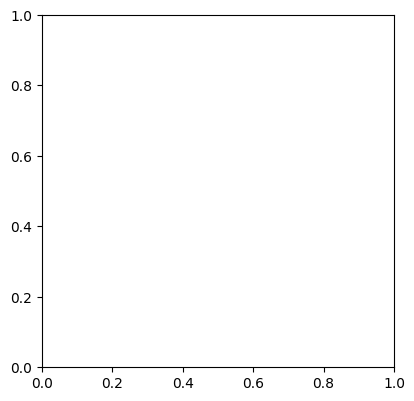

In [ ]:
# try to understand only one image IoU calculation ( thermal unet)


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths for the specific image
thermal_id = "1408"
manual_mask_path = f'/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_MANUAL_THERMAL/FLIR{thermal_id}_jpg.rf.some_hash.jpg_mask.png'
unet_mask_path = f'/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/unet/tiff/FLIR{thermal_id}.tiff'

# Load both mask images
manual_mask = cv2.imread(manual_mask_path, cv2.IMREAD_GRAYSCALE)
unet_mask = cv2.imread(unet_mask_path, cv2.IMREAD_GRAYSCALE)

# Convert UNet mask to binary: non-white to black
_, unet_binary_mask = cv2.threshold(unet_mask, 254, 255, cv2.THRESH_BINARY_INV)

# Calculate the intersection and union focusing on the object (black as the object)
intersection = np.logical_and(manual_mask == 0, unet_binary_mask == 0).sum()
union = np.logical_or(manual_mask == 0, unet_binary_mask == 0).sum()

# Calculate IoU
iou = intersection / union if union != 0 else 0

# Display IoU
print(f"IoU for Thermal_id {thermal_id}: {iou}")

# Plot both images for visual comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(manual_mask, cmap='gray')
plt.title('Manual Mask')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(unet_binary_mask, cmap='gray')
plt.title('UNet Binary Mask')
plt.axis('off')

plt.show()


SAM RGB VS MANUAL IOU

In [ ]:
import os
import cv2
import numpy as np

# Directories for manual and SAM segmented masks
manual_mask_dir = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM'
sam_mask_dir = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_automate_mask_ganarator/RGB'

# Function to calculate IoU
def calculate_iou(mask1, mask2):
    """
    Calculate the Intersection over Union (IoU) between two binary masks.
    :param mask1: First binary mask.
    :param mask2: Second binary mask.
    :return: IoU score (a float between 0 and 1).
    """
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0  # To avoid division by zero
    return intersection / union

# Function to find a mask file based on the first 8 characters
def find_mask_by_id(mask_dir, image_id):
    """
    Search for a mask file in a directory based on the first 8 characters of the filename.
    :param mask_dir: Directory to search in.
    :param image_id: The first 8 characters of the image ID.
    :return: Full path to the mask if found, None otherwise.
    """
    for filename in os.listdir(mask_dir):
        if filename[:8] == image_id:  # Only compare the first 8 characters
            return os.path.join(mask_dir, filename)
    return None

# Add a new column for IoU values
df['IOU_SAM'] = None  # Initialize the column with None

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    image_id = row['RGB_id'][:8]  # Extract the first 8 characters of the image ID

    # Find the corresponding manual and SAM mask paths based only on the first 8 characters
    manual_mask_path = find_mask_by_id(manual_mask_dir, image_id)
    sam_mask_path = find_mask_by_id(sam_mask_dir, image_id)

    # Check if both masks exist
    if not manual_mask_path or not sam_mask_path:
        print(f"Mask not found for {image_id}")
        continue

    # Load the manual and SAM masks
    manual_mask = cv2.imread(manual_mask_path, cv2.IMREAD_GRAYSCALE)
    sam_mask = cv2.imread(sam_mask_path, cv2.IMREAD_GRAYSCALE)

    # Ensure both masks are binary (thresholding)
    _, manual_binary = cv2.threshold(manual_mask, 127, 255, cv2.THRESH_BINARY)
    _, sam_binary = cv2.threshold(sam_mask, 127, 255, cv2.THRESH_BINARY)

    # Invert the manual mask to match the convention of SAM (white object, black background)
    manual_binary_inverted = 255 - manual_binary

    # Resize SAM mask to match manual mask dimensions if necessary
    if sam_binary.shape != manual_binary_inverted.shape:
        sam_binary = cv2.resize(sam_binary, (manual_binary_inverted.shape[1], manual_binary_inverted.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Calculate IoU between the inverted manual mask and the SAM mask
    iou = calculate_iou(manual_binary_inverted > 0, sam_binary > 0)

    # Insert the IoU value into the DataFrame
    df.at[index, 'IOU_SAM'] = iou

    print(f"Processed {image_id}: IoU = {iou:.4f}")

# Show the updated DataFrame with IoU values
df.head()


Processed 1D3A3155: IoU = 0.9961
Processed 1D3A3159: IoU = 0.9949
Processed 1D3A3345: IoU = 0.9966
Processed 1D3A3208: IoU = 0.9958
Processed 1D3A3259: IoU = 0.9928
Processed 1D3A3160: IoU = 0.9971
Processed 1D3A3387: IoU = 0.9955
Processed 1D3A3393: IoU = 0.9962
Processed 1D3A3414: IoU = 0.9923
Processed 1D3A3408: IoU = 0.9936
Processed 1D3A3236: IoU = 0.9956
Processed 1D3A3375: IoU = 0.9929
Processed 1D3A3426: IoU = 0.9955
Processed 1D3A3460: IoU = 0.9301
Processed 1D3A3277: IoU = 0.9962
Processed 1D3A3200: IoU = 0.9919
Processed 1D3A3390: IoU = 0.9961
Processed 1D3A3361: IoU = 0.9926
Processed 1D3A3411: IoU = 0.9962
Processed 1D3A3371: IoU = 0.9958
Processed 1D3A3263: IoU = 0.9965
Processed 1D3A3382: IoU = 0.9954
Processed 1D3A3245: IoU = 0.9928
Processed 1D3A3471: IoU = 0.9922
Processed 1D3A3394: IoU = 0.9947
Processed 1D3A4452: IoU = 0.9939
Processed 1D3A4389: IoU = 0.9978
Processed 1D3A4312: IoU = 0.9952
Processed 1D3A4408: IoU = 0.9951
Processed 1D3A4350: IoU = 0.9953
Processed 

,RGB_id,Thermal_id,RGB_gt_area,RGB_Unet_area,RGB_unet_dif_%,RGB_SAM_area,RGB_SAM_dif_%,RGB_active_contour_area,IOU_SAM
0,1D3A3155,843.0,4764517,5765162,21.0,4768320,0.1,None,0.99606
1,1D3A3159,830.0,3658096,3793489,3.7,3673136,0.4,None,0.994893
2,1D3A3345,1013.0,5511131,5718797,3.8,5527792,0.3,None,0.996594
3,1D3A3208,881.0,3023908,3121218,3.2,3030160,0.2,None,0.995805
4,1D3A3259,930.0,7079853,7372472,4.1,7131264,0.7,None,0.992758


IOU THERMAL SAM vs manual - don't think it is good

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import sys

# Define paths for manually segmented and automatically segmented mask images
manual_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_MANUAL_THERMAL'
auto_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_automate_mask_ganarator/Thermal'

# Add a new column 'IOU_SAM_thermal' to df for storing IoU results
df['IOU_SAM_thermal'] = None

# Debug: print out what's in the directories (optional)
print("Manual Mask Directory Contents:")
for f in os.listdir(manual_mask_folder):
    print(f)
print("\nAutomated Mask Directory Contents:")
for f in os.listdir(auto_mask_folder):
    print(f)

# Function to find the matching file by ID
def find_matching_file(folder, thermal_id, is_auto):
    target_prefix = f"FLIR{thermal_id}"
    for filename in os.listdir(folder):
        if filename.startswith(target_prefix):
            if (is_auto and filename.endswith("_masked.tiff")) or (not is_auto and filename.endswith("_mask.png")):
                return os.path.join(folder, filename)
    return None

# Iterate over the DataFrame and process each pair of mask images
for index, row in df.iterrows():
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue

    # Format the Thermal_id appropriately
    thermal_id_formatted = f"{int(row['Thermal_id']):04d}"  # Converts to int and formats as zero-padded string

    # Debug: print expected filenames for this thermal_id
    print(f"Checking Thermal_id: {row['Thermal_id']} formatted as {thermal_id_formatted}")

    # Find the corresponding filenames
    manual_path = find_matching_file(manual_mask_folder, thermal_id_formatted, is_auto=False)
    auto_path = find_matching_file(auto_mask_folder, thermal_id_formatted, is_auto=True)

    # Debug: print paths being checked
    print(f"Expected manual path: {manual_path}")
    print(f"Expected automated path: {auto_path}")

    if manual_path and auto_path:
        # Load both mask images
        manual_mask = cv2.imread(manual_path, cv2.IMREAD_GRAYSCALE)
        auto_mask = cv2.imread(auto_path, cv2.IMREAD_GRAYSCALE)

        # Invert manual mask to align backgrounds
        manual_mask = cv2.bitwise_not(manual_mask)

        # Calculate the intersection and union for IoU
        intersection = np.logical_and(manual_mask == 255, auto_mask == 255).sum()
        union = np.logical_or(manual_mask == 255, auto_mask == 255).sum()

        # Calculate IoU and store it in the DataFrame
        iou = intersection / union if union != 0 else 0
        df.at[index, 'IOU_SAM_thermal'] = iou
    else:
        print(f"Missing mask image(s) for Thermal_id: {thermal_id_formatted} (Manual: {'Found' if manual_path else 'Missing'}, Auto: {'Found' if auto_path else 'Missing'})")
    sys.exit(0)
# Display the updated DataFrame
print(df)


Manual Mask Directory Contents:
FLIR1749_jpg.rf.474a130df3974ca42579ca217b6e939d.jpg_mask.png
FLIR1080_jpg.rf.3e06ec5b6b3458dc58f344db434618dc.jpg_mask.png
FLIR1944_jpg.rf.2d0ee3cf19e58b48589ac96d351a862a.jpg_mask.png
FLIR1744_jpg.rf.32f57c76ca647e8a771b60259db6f562.jpg_mask.png
FLIR1056_jpg.rf.0e7bc443b3b09562c4c2bc7b92ff8f50.jpg_mask.png
FLIR2012_jpg.rf.076ee2026add41ebd163d6c64993ab61.jpg_mask.png
FLIR1885_jpg.rf.1e38d076a95e5cbb3f778e62c5ba7b08.jpg_mask.png
FLIR1389_jpg.rf.2e0296d4982eb33c69509e8101b32ef4.jpg_mask.png
FLIR0934_jpg.rf.24c494429da3426caf086f91bb07fc87.jpg_mask.png
FLIR1616_jpg.rf.23655aff9a1a3dea8d49ddeeda4ae908.jpg_mask.png
FLIR1425_jpg.rf.0363c9af57273af40c8464bdcdbbbb7f.jpg_mask.png
FLIR1958_jpg.rf.326eebd8b60020d28631966a3f60ae8c.jpg_mask.png
FLIR1651_jpg.rf.20f8c6dd41dd0a33776ba64c31951b74.jpg_mask.png
FLIR0873_jpg.rf.23d1104a8477b4e85833ab5ec0cfdc50.jpg_mask.png
FLIR1655_jpg.rf.a4e7cf35259ea5bfaebeb213e3c87081.jpg_mask.png
FLIR0881_jpg.rf.89a469ee52bfdda012cda6

NameError: name 'sys' is not defined

run again the same ( iou sam ) try to find the mistake

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import sys

# Define paths for manually segmented and automatically segmented mask images
manual_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_MANUAL_THERMAL'
auto_mask_folder = '/content/drive/Othercomputers/My PC/Thesis/roboflowV6_1169/SAM_automate_mask_ganarator/Thermal'

# Create or load DataFrame
# Assuming 'df' exists, if not, initialize it here or load it
# df = pd.DataFrame(...)  # Load or define your DataFrame here

# Add a new column 'IOU_SAM_thermal' to df for storing IoU results
df['IOU_SAM_thermal'] = None

# Debug: print out what's in the directories (optional)
print("Manual Mask Directory Contents:")
for f in os.listdir(manual_mask_folder):
    print(f)
print("\nAutomated Mask Directory Contents:")
for f in os.listdir(auto_mask_folder):
    print(f)

# Function to find the matching file by ID
def find_matching_file(folder, thermal_id, is_auto):
    target_prefix = f"FLIR{thermal_id}"
    for filename in os.listdir(folder):
        if filename.startswith(target_prefix):
            if (is_auto and filename.endswith("_masked.tiff")) or (not is_auto and filename.endswith("_mask.png")):
                return os.path.join(folder, filename)
    return None

# Iterate over the DataFrame and process each pair of mask images
for index, row in df.iterrows():
    if pd.isna(row['Thermal_id']):
        print(f"Thermal_id is NaN at index {index}")
        continue

    # Format the Thermal_id appropriately
    thermal_id_formatted = f"{int(row['Thermal_id']):04d}"  # Converts to int and formats as zero-padded string

    # Debug: print expected filenames for this thermal_id
    print(f"Checking Thermal_id: {row['Thermal_id']} formatted as {thermal_id_formatted}")

    # Find the corresponding filenames
    manual_path = find_matching_file(manual_mask_folder, thermal_id_formatted, is_auto=False)
    auto_path = find_matching_file(auto_mask_folder, thermal_id_formatted, is_auto=True)

    # Debug: print paths being checked
    print(f"Expected manual path: {manual_path}")
    print(f"Expected automated path: {auto_path}")

    if manual_path and auto_path:
        # Load both mask images
        manual_mask = cv2.imread(manual_path, cv2.IMREAD_GRAYSCALE)
        auto_mask = cv2.imread(auto_path, cv2.IMREAD_GRAYSCALE)

        # Debug: Print loaded image names
        print(f"Loaded manual mask: {os.path.basename(manual_path)}")
        print(f"Loaded automated mask: {os.path.basename(auto_path)}")

        # Invert manual mask to align backgrounds
        manual_mask = cv2.bitwise_not(manual_mask)

        # Calculate the intersection and union for IoU
        intersection = np.logical_and(manual_mask == 255, auto_mask == 255).sum()
        union = np.logical_or(manual_mask == 255, auto_mask == 255).sum()

        # Calculate IoU and store it in the DataFrame
        iou = intersection / union if union != 0 else 0
        df.at[index, 'IOU_SAM_thermal'] = iou

        # Debug: Print IoU calculation details
        print(f"IoU for Thermal_id {thermal_id_formatted}: {iou}")
    else:
        print(f"Missing mask image(s) for Thermal_id: {thermal_id_formatted} (Manual: {'Found' if manual_path else 'Missing'}, Auto: {'Found' if auto_path else 'Missing'})")
    # sys.exit(0)  # Exit if any images are missing to stop the process and investigate

# Display the updated DataFrame
print(df)


Manual Mask Directory Contents:
FLIR1749_jpg.rf.474a130df3974ca42579ca217b6e939d.jpg_mask.png
FLIR1080_jpg.rf.3e06ec5b6b3458dc58f344db434618dc.jpg_mask.png
FLIR1944_jpg.rf.2d0ee3cf19e58b48589ac96d351a862a.jpg_mask.png
FLIR1744_jpg.rf.32f57c76ca647e8a771b60259db6f562.jpg_mask.png
FLIR1056_jpg.rf.0e7bc443b3b09562c4c2bc7b92ff8f50.jpg_mask.png
FLIR2012_jpg.rf.076ee2026add41ebd163d6c64993ab61.jpg_mask.png
FLIR1885_jpg.rf.1e38d076a95e5cbb3f778e62c5ba7b08.jpg_mask.png
FLIR1389_jpg.rf.2e0296d4982eb33c69509e8101b32ef4.jpg_mask.png
FLIR0934_jpg.rf.24c494429da3426caf086f91bb07fc87.jpg_mask.png
FLIR1616_jpg.rf.23655aff9a1a3dea8d49ddeeda4ae908.jpg_mask.png
FLIR1425_jpg.rf.0363c9af57273af40c8464bdcdbbbb7f.jpg_mask.png
FLIR1958_jpg.rf.326eebd8b60020d28631966a3f60ae8c.jpg_mask.png
FLIR1651_jpg.rf.20f8c6dd41dd0a33776ba64c31951b74.jpg_mask.png
FLIR0873_jpg.rf.23d1104a8477b4e85833ab5ec0cfdc50.jpg_mask.png
FLIR1655_jpg.rf.a4e7cf35259ea5bfaebeb213e3c87081.jpg_mask.png
FLIR0881_jpg.rf.89a469ee52bfdda012cda6

# **Analyze**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your loaded DataFrame

# 1. Calculate the mean and maximum for RGB_unet_dif_% and RGB_SAM_dif_%
mean_unet = df['RGB_unet_dif_%'].mean()
mean_sam = df['RGB_SAM_dif_%'].mean()
mean_IOU_SAM = df['IOU_SAM'].mean()
mean_IOU_UNet = df['IOU_UNet'].mean()
mean_IOU_SAM_thermal = df['IOU_SAM_thermal'].mean()
mean_IOU_UNet_thermal = df['IOU_UNet_thermal'].mean()
max_unet = df['RGB_unet_dif_%'].max()
max_sam = df['RGB_SAM_dif_%'].max()

print(f"Mean of RGB_unet_dif_%: {mean_unet}")
print(f"Mean of RGB_SAM_dif_%: {mean_sam}")
print(f"Mean of IOU_SAM: {mean_IOU_SAM}")
print(f"Mean of IOU_UNet: {mean_IOU_UNet}")
print(f"Mean of IOU_SAM thermal: {mean_IOU_SAM_thermal}")
print(f"Mean of IOU_UNet thermal: {mean_IOU_UNet_thermal}")
print(f"Max of RGB_unet_dif_%: {max_unet}")
print(f"Max of RGB_SAM_dif_%: {max_sam}")

# 2. Calculate how many rows where RGB_SAM_dif_% is smaller than RGB_unet_dif_% and vice versa
sam_smaller = (df['RGB_SAM_dif_%'] < df['RGB_unet_dif_%']).sum()
unet_smaller = (df['RGB_SAM_dif_%'] > df['RGB_unet_dif_%']).sum()

print(f"Rows where RGB_SAM_dif_% is smaller than RGB_unet_dif_%: {sam_smaller}")
print(f"Rows where RGB_SAM_dif_% is larger than RGB_unet_dif_%: {unet_smaller}")

# 3. Calculate standard deviation of all IoU columns
iou_columns = ['IOU_SAM', 'IOU_UNet', 'IOU_UNet_thermal', 'IOU_SAM_thermal']
iou_std = df[iou_columns].std()

# Print the standard deviation of IoU columns
print("\nStandard Deviation of IoU Columns:")
print(iou_std)


Mean of RGB_unet_dif_%: 9.815
Mean of RGB_SAM_dif_%: 2.306
Mean of IOU_SAM: 0.9697396596939575
Mean of IOU_UNet: 0.9016593646031353
Mean of IOU_SAM thermal: 0.7922396252806161
Mean of IOU_UNet thermal: 0.48544131850259026
Max of RGB_unet_dif_%: 100.0
Max of RGB_SAM_dif_%: 88.7
Rows where RGB_SAM_dif_% is smaller than RGB_unet_dif_%: 91
Rows where RGB_SAM_dif_% is larger than RGB_unet_dif_%: 8

Standard Deviation of IoU Columns:
IOU_SAM             0.142122
IOU_UNet            0.185132
IOU_UNet_thermal    0.428952
IOU_SAM_thermal     0.358300
dtype: float64


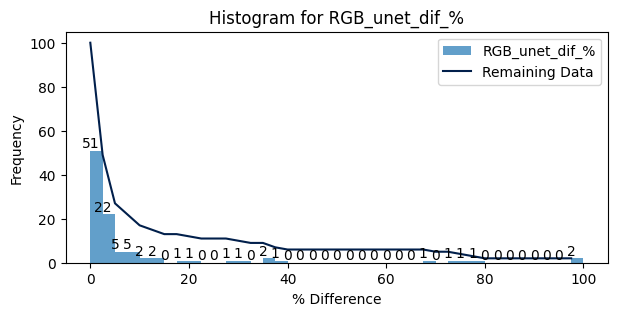

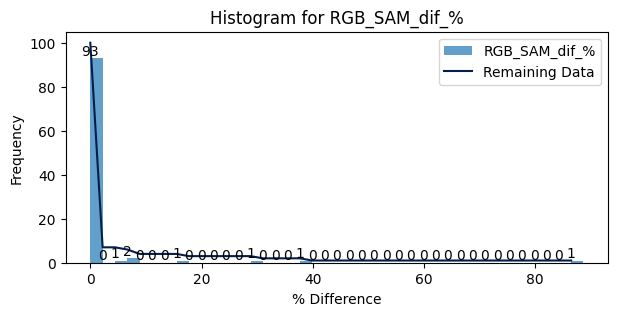

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Plot classic histogram for RGB_unet_dif_% with counts and remaining data line
plt.figure(figsize=(7, 3))  # Smaller plot size

# Increase the number of bins for more bars
counts_unet, bins_unet, _ = plt.hist(df['RGB_unet_dif_%'], bins=40, color='#1f77b4', alpha=0.7, label='RGB_unet_dif_%')

# Add text on top of each bar (the counts)
for i in range(len(counts_unet)):
    plt.text(bins_unet[i], counts_unet[i], str(int(counts_unet[i])), ha='center', va='bottom')

# Calculate remaining counts (starting from the total and decreasing for each bin)
remaining_unet = np.flip(np.cumsum(np.flip(counts_unet)))

# Plot the remaining data line in black
plt.plot(bins_unet[:-1], remaining_unet, color='#011f4b', label='Remaining Data')

plt.title('Histogram for RGB_unet_dif_%')
plt.xlabel('% Difference')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
# Remove grid lines
plt.grid(False)

# Show the plot for RGB_unet_dif_%
plt.show()

# 2. Plot classic histogram for RGB_SAM_dif_% with counts and remaining data line
plt.figure(figsize=(7, 3))  # Smaller plot size

# Increase the number of bins for more bars
counts_sam, bins_sam, _ = plt.hist(df['RGB_SAM_dif_%'], bins=40, color='#1f77b4', alpha=0.7, label='RGB_SAM_dif_%')

# Add text on top of each bar (the counts)
for i in range(len(counts_sam)):
    plt.text(bins_sam[i], counts_sam[i], str(int(counts_sam[i])), ha='center', va='bottom')

# Calculate remaining counts (starting from the total and decreasing for each bin)
remaining_sam = np.flip(np.cumsum(np.flip(counts_sam)))

# Plot the remaining data line in black
plt.plot(bins_sam[:-1], remaining_sam, color='#011f4b', label='Remaining Data')

plt.title('Histogram for RGB_SAM_dif_%')
plt.xlabel('% Difference')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
# Remove grid lines
plt.grid(False)

# Show the plot for RGB_SAM_dif_%
plt.show()


## **Calculate IOU**

In [ ]:
df

,RGB_id,Thermal_id,RGB_gt_area,RGB_Unet_area,RGB_unet_dif_%,RGB_SAM_area,RGB_SAM_dif_%,RGB_active_contour_area,IOU_SAM,IOU_UNet,Thermal_gt_area,Thermal_Unet_area,Thermal_unet_dif_%,Thermal_SAM_area,Thermal_SAM_dif_%%,IOU_UNet_thermal,IOU_SAM_thermal
0,1D3A3155,843.0,4764517,5765162,21.0,4768320,0.1,NaN,0.996060,0.708322,53590.0,15988.0,70.2,54176.0,1.1,0.951194,0.977757
1,1D3A3159,830.0,3658096,3793489,3.7,3673136,0.4,NaN,0.994893,0.964274,32130.0,142881.0,344.7,32832.0,2.2,0.77753,0.97285
2,1D3A3345,1013.0,5511131,5718797,3.8,5527792,0.3,NaN,0.996594,0.963673,49782.0,51929.0,4.3,50272.0,1.0,0.99685,0.984175
3,1D3A3208,881.0,3023908,3121218,3.2,3030160,0.2,NaN,0.995805,0.968517,52296.0,3513.0,93.3,54544.0,4.3,0.929035,0.955344
4,1D3A3259,930.0,7079853,7372472,4.1,7131264,0.7,NaN,0.992758,0.960199,58568.0,23123.0,60.5,60512.0,3.3,0.896168,0.964044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1D3A5391,1891.0,6568740,6704184,2.1,6587408,0.3,NaN,0.996619,0.979797,78071.0,80592.0,3.2,77776.0,0.4,0.9961,0.987642
96,1D3A5499,1999.0,9303287,9463164,1.7,9320368,0.2,NaN,0.996669,0.983105,121573.0,114685.0,5.7,123008.0,1.2,0.972725,0.983867
97,1D3A5385,1885.0,6082396,6188225,1.7,6075072,0.1,NaN,0.996342,0.981883,138395.0,141425.0,2.2,138432.0,0.0,0.995324,0.990559
98,1D3A5619,2119.0,4880941,5587340,14.5,4907392,0.5,NaN,0.994387,0.870077,72691.0,0.0,100.0,256896.0,253.4,0.907569,0.0


## **Save as excel file**

In [8]:
# Define the path to save the DataFrame as an Excel file
save_path = '/content/drive/Othercomputers/My PC/Thesis/Performance measures/performance_measures_active.xlsx'

# Save the DataFrame to the specified path
df.to_excel(save_path, index=False)

# Confirmation message
print(f"DataFrame saved successfully to {save_path}")


DataFrame saved successfully to /content/drive/Othercomputers/My PC/Thesis/Performance measures/performance_measures_active.xlsx


statistic test

In [ ]:
from scipy.stats import ttest_rel, wilcoxon, shapiro

# Calculate absolute differences
df['SAM_diff'] = abs(df['RGB_SAM_area'] - df['RGB_gt_area'])
df['UNet_diff'] = abs(df['RGB_Unet_area'] - df['RGB_gt_area'])

# Check normality of the differences
print("Shapiro-Wilk Test for Normality:")
print("SAM Differences:", shapiro(df['SAM_diff']))
print("UNet Differences:", shapiro(df['UNet_diff']))

# If normal, perform paired t-test
if shapiro(df['SAM_diff']).pvalue > 0.05 and shapiro(df['UNet_diff']).pvalue > 0.05:
    print("\nPaired t-test Results:")
    ttest_result = ttest_rel(df['SAM_diff'], df['UNet_diff'])
    print(ttest_result)
else:
    # If not normal, perform Wilcoxon signed-rank test
    print("\nWilcoxon Signed-Rank Test Results:")
    wilcoxon_result = wilcoxon(df['SAM_diff'], df['UNet_diff'])
    print(wilcoxon_result)

# Descriptive statistics for differences
print("\nMean Absolute Differences:")
print("SAM:", df['SAM_diff'].mean())
print("UNet:", df['UNet_diff'].mean())


Shapiro-Wilk Test for Normality:
SAM Differences: ShapiroResult(statistic=0.19441449273281308, pvalue=6.3096390412681484e-21)
UNet Differences: ShapiroResult(statistic=0.46132578328606955, pvalue=1.9055633263375665e-17)

Wilcoxon Signed-Rank Test Results:
WilcoxonResult(statistic=410.0, pvalue=3.54054012128439e-13)

Mean Absolute Differences:
SAM: 181836.53
UNet: 572108.64
